Problem Statement: The goal is to analyze the Netflix dataset to provide data-backed insights that can help Netflix decide which type of shows/movies to produce and how to grow their business in different countries.


In [53]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = 'netflix_titles.csv'
netflix_data = pd.read_csv(dataset_path)

# Display first few rows of the dataset
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [54]:
# Checking the shape of the dataset
dataset_shape = netflix_data.shape

# Checking data types of the attributes
dataset_dtypes = netflix_data.dtypes

dataset_shape, dataset_dtypes

((8807, 12),
 show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 date_added      object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object)

### Numerical Attributes
Count: 8,807 entries  
Mean: Around the year 2014  
Standard Deviation: Approximately 8.82 years  
Minimum: Year 1925  
25th Percentile (Q1): Year 2013  
Median (50th Percentile): Year 2017  
75th Percentile (Q3): Year 2019  
Maximum: Year 2021  

In [55]:
# Displaying basic metrics using the describe() method for numerical columns
basic_metrics_numerical = netflix_data.describe()
basic_metrics_numerical

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Categorical Attributes  

In [56]:
# Displaying basic metrics for categorical columns like 'Type', 'Country', and 'Rating'
basic_metrics_categorical = netflix_data[['type', 'country', 'rating']].describe(include=['object'])
basic_metrics_categorical

,type,country,rating
count,8807,7976,8803
unique,2,748,17
top,Movie,United States,TV-MA
freq,6131,2818,3207


## Observations
-  The average release_year being around 2014, along with a median of 2017, suggests that Netflix has a lot of content from the recent decade.  
-  The United States appears to be the most common country for content production, followed by a wide range of other countries, indicating a diverse content catalog.  
-  The rating “TV-MA” is the most frequent, suggesting a focus on mature audiences.  

In [57]:
# Convert categorical attributes to 'category' data type if required
categorical_columns = ['type', 'country', 'rating']
netflix_data[categorical_columns] = netflix_data[categorical_columns].astype('category')

# After conversion data types
after_conversion_data_types = netflix_data.dtypes
after_conversion_data_types

show_id           object
type            category
title             object
director          object
cast              object
country         category
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

In [58]:
# Checking for missing values
missing_values = netflix_data.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Summary Statistics and Categorical Breakdown


In [68]:
# Non-Graphical Analysis: Value counts for key attributes
value_counts_type = netflix_data['type'].value_counts()
value_counts_country = netflix_data['country'].value_counts().head(10)  # Top 10 countries
value_counts_rating = netflix_data['rating'].value_counts()
value_counts_release_year = netflix_data['release_year'].value_counts().head(10)  # Top 10 release years

# Unique attributes for key columns
unique_type = netflix_data['type'].unique()
unique_country = netflix_data['country'].unique()
unique_rating = netflix_data['rating'].unique()
unique_release_year = netflix_data['release_year'].unique()

In [69]:
value_counts_type  # Movie vs TV Show count

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [70]:
value_counts_country   # COuntry wise counts

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [71]:
value_counts_rating

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: count, dtype: int64

In [72]:
value_counts_release_year  #Year wise production count

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

In [73]:
unique_type

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

In [74]:
unique_country

['United States', 'South Africa', NaN, 'India', 'United States, Ghana, Burkina Faso, United Ki..., ..., 'Russia, Spain', 'Croatia, Slovenia, Serbia, Montenegro', 'Japan, Canada', 'United States, France, South Korea, Indonesia', 'United Arab Emirates, Jordan']
Length: 749
Categories (748, object): [', France, Algeria', ', South Korea', 'Argentina', 'Argentina, Brazil, France, Poland, Germany, D..., ..., 'Venezuela, Colombia', 'Vietnam', 'West Germany', 'Zimbabwe']

In [75]:
unique_rating

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., '66 min', 'NR', NaN, 'TV-Y7-FV', 'UR']
Length: 18
Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

In [76]:
unique_release_year

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

## Observations

-  It seems like Netflix produces much more Movies than TV Shows since the production is almost double that of shows.  
-  The United States is the leading country in producing content, followed by India and the United Kingdom.

## Univariate Analysis

In [77]:
# Unnesting the data in columns like Actor, Director, Country
# Splitting the comma-separated values and unnesting
unnested_director = netflix_data.assign(director=netflix_data['director'].str.split(', ')).explode('director')
unnested_cast = netflix_data.assign(cast=netflix_data['cast'].str.split(', ')).explode('cast')
unnested_country = netflix_data.assign(country=netflix_data['country'].str.split(', ')).explode('country')

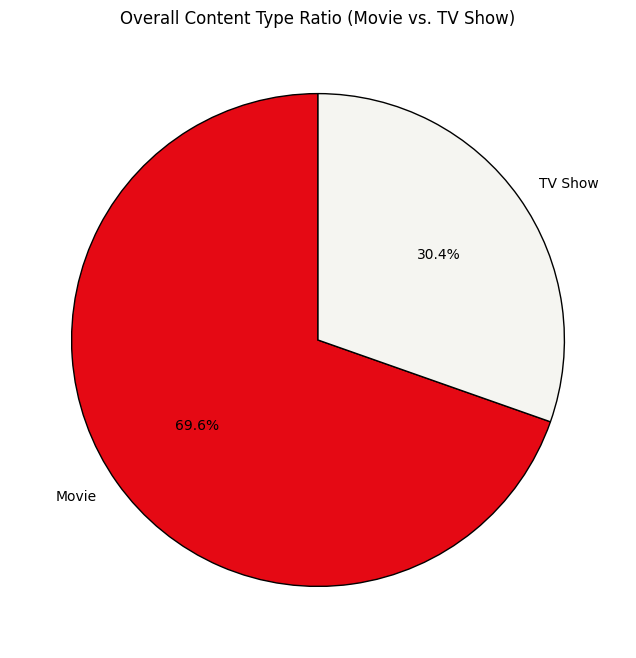

In [78]:
# Content distribution (Movie/TV Show)
type_counts = netflix_data['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    type_counts, 
    labels=type_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#e50914', '#f5f5f1'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Overall Content Type Ratio (Movie vs. TV Show)')
plt.show()

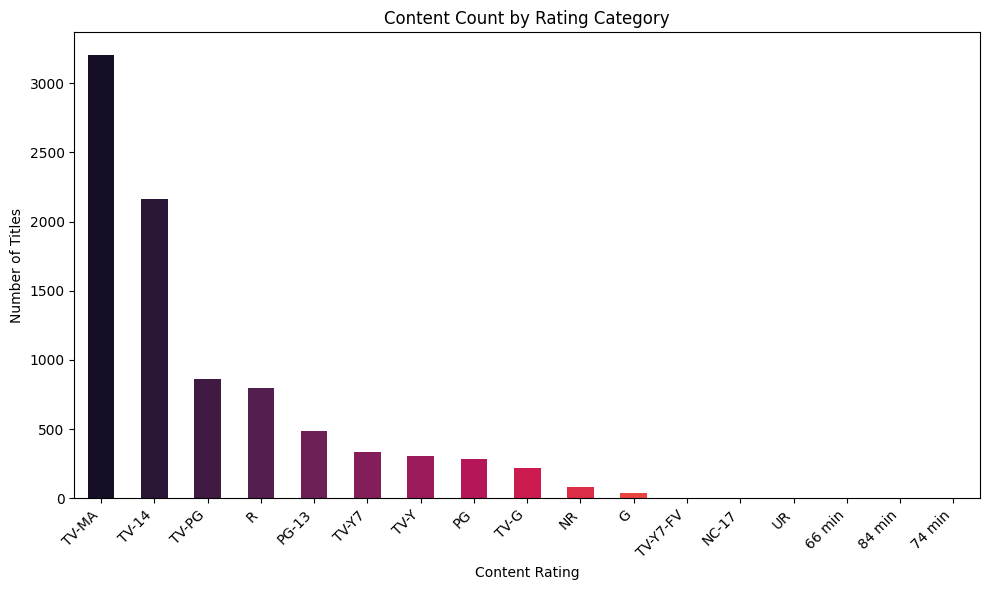

In [79]:
# Countplot for Rating
rating_counts = netflix_data['rating'].value_counts()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color=sns.color_palette("rocket", len(rating_counts)))
plt.title('Content Count by Rating Category')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The majority of the content is rated “TV-MA” followed by “TV-14”, indicating a focus on mature audiences and teenagers.

C:\Users\devanshiagarwal\AppData\Local\Temp\ipykernel_9408\3014394010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette='rocket_r')


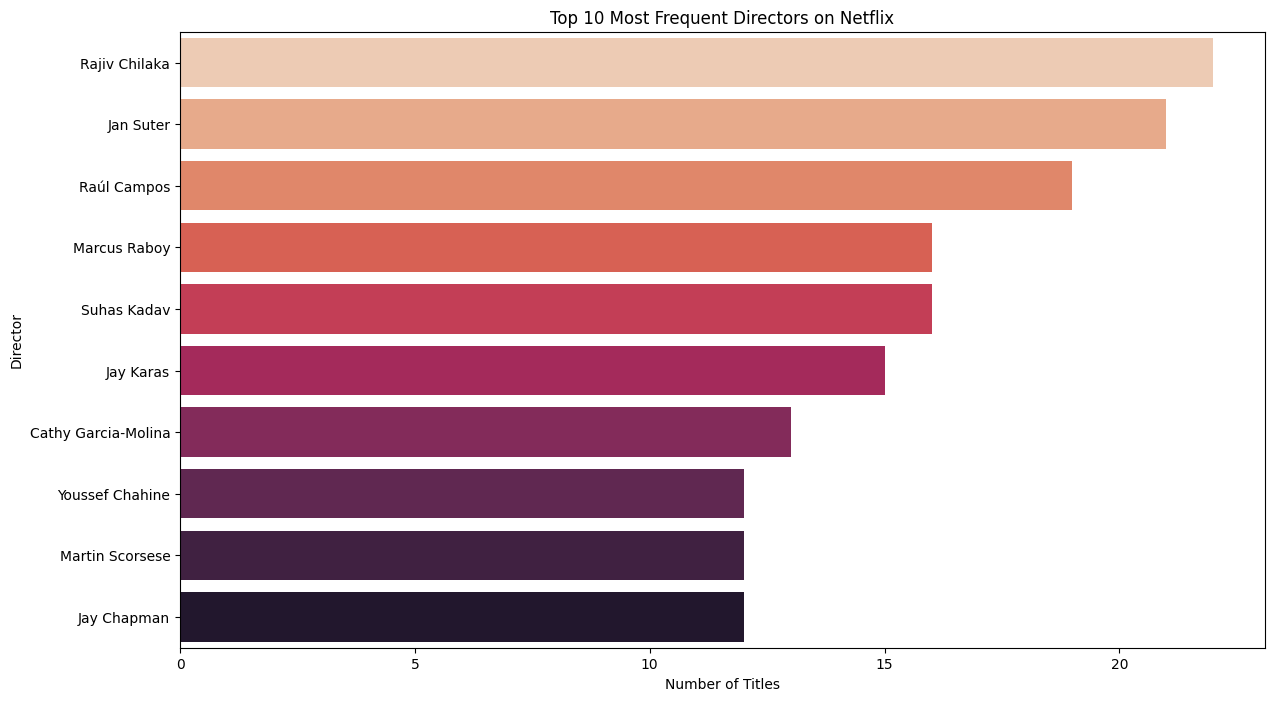

In [80]:
top_directors = unnested_director['director'].value_counts().head(10)

# Visualizing the top 10 directors with a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='rocket_r')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

C:\Users\devanshiagarwal\AppData\Local\Temp\ipykernel_9408\3121338104.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix_data['release_year'], kde=True, bins=30)


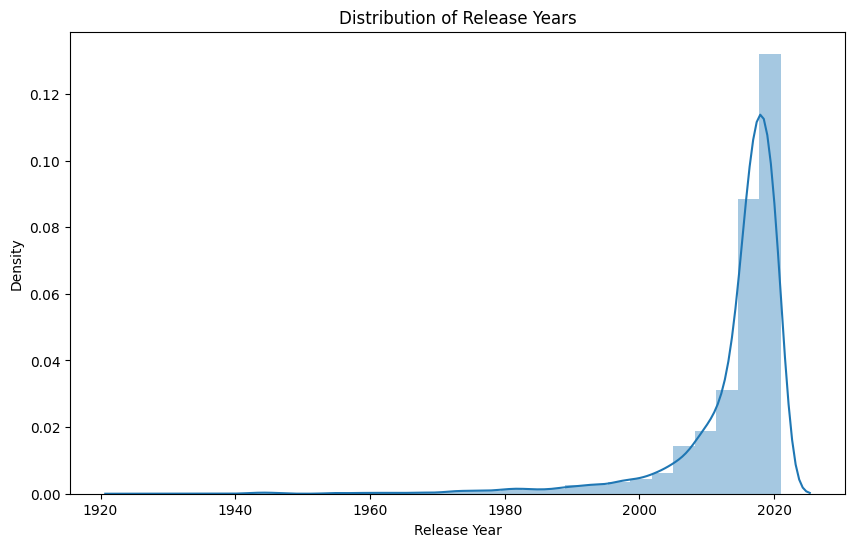

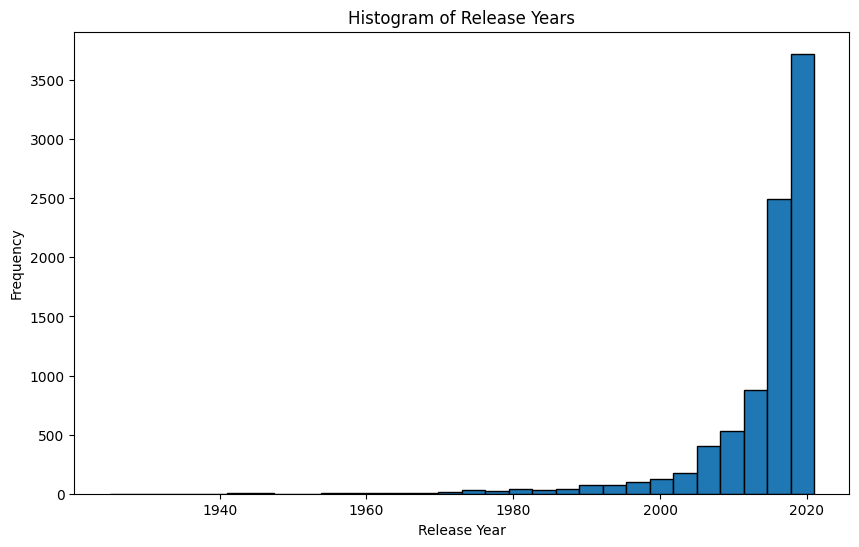

In [81]:
# Distplot for release_year
plt.figure(figsize=(10, 6))
sns.distplot(netflix_data['release_year'], kde=True, bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()

# Histogram for release_year
plt.figure(figsize=(10, 6))
plt.hist(netflix_data['release_year'], bins=30, edgecolor='black')
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

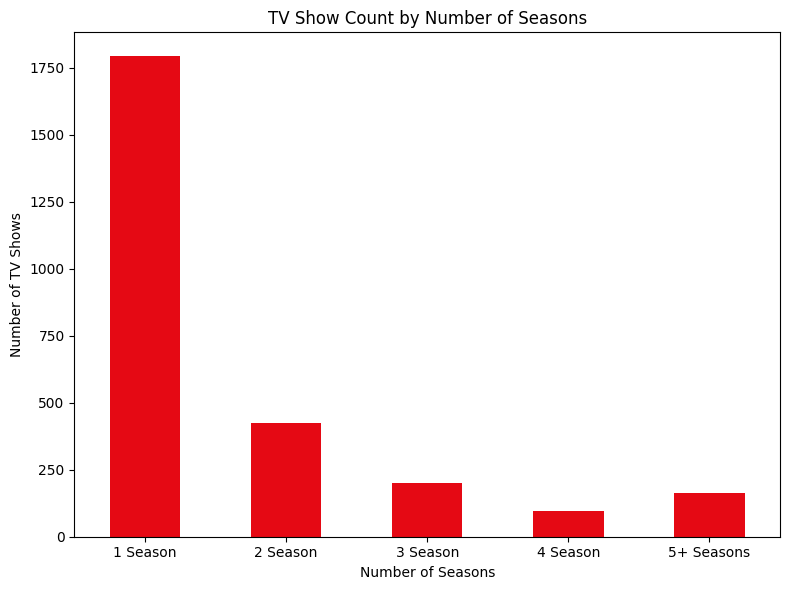

In [90]:
# For TV Shows: extract number of seasons
netflix_data_tv = netflix_data[netflix_data['type'] == 'TV Show'].copy()
netflix_data_tv.dropna(subset=['duration'], inplace=True)
netflix_data_tv['seasons_count'] = netflix_data_tv['duration'].str.extract(r'(\d+)').astype(int)

# C.2 TV Show Season Count (Bar Chart - Binge vs. Long-running Content)
tv_seasons_counts = netflix_data_tv['seasons_count'].value_counts().sort_index()

# Combine seasons 5 and above into '5+ Seasons' for readability
tv_seasons_for_plot = tv_seasons_counts[tv_seasons_counts.index < 5].copy()
tv_seasons_for_plot['5+ Seasons'] = tv_seasons_counts[tv_seasons_counts.index >= 5].sum()
# Prepare index labels
labels = [str(i) + ' Season' for i in tv_seasons_for_plot.index[:-1]] + ['5+ Seasons']
tv_seasons_for_plot.index = labels

plt.figure(figsize=(8, 6))
tv_seasons_for_plot.plot(kind='bar', color='#e50914')
plt.title('TV Show Count by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Bivariate & Multivariate Analysis

### Country vs. Type (Content Strategy by Geography)

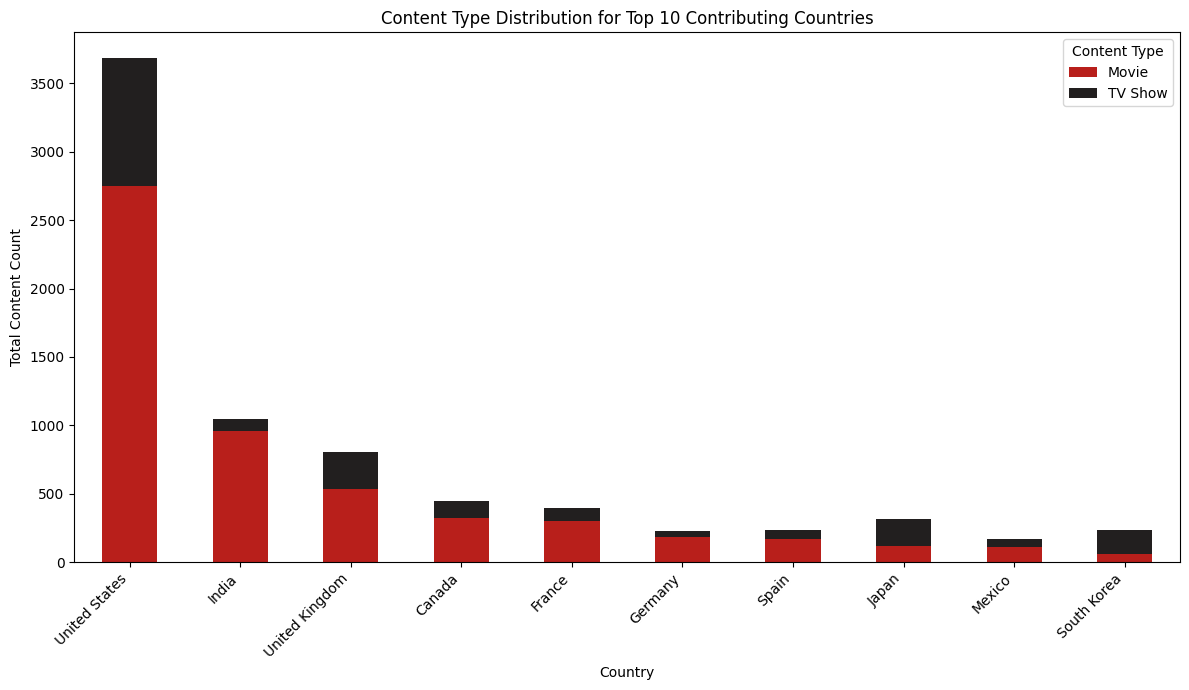

In [83]:
# Check if 'country' is Categorical (which causes the fillna error)
if netflix_data['country'].dtype.name == 'category':
    # If it is, explicitly add 'Unknown' as a category to allow fillna to work.
    if 'Unknown' not in netflix_data['country'].cat.categories:
        netflix_data['country'] = netflix_data['country'].cat.add_categories('Unknown')

# Explode country column for one country per row analysis
# Note: The .str.split() operation implicitly converts the column to string type for the split logic.
countries = netflix_data.assign(country=netflix_data['country'].fillna('Unknown').str.split(', ')).explode('country')
countries['country'] = countries['country'].str.strip()

# Filter out any temporary 'nan' strings that might exist before the fillna
countries_filtered = countries[countries['country'].str.lower() != 'nan'].copy()

# Filter for top 10 countries (excluding 'Unknown' or 'nan' that might still exist)
top_10_countries = countries_filtered[countries_filtered['country'] != 'Unknown']['country'].value_counts().nlargest(10).index
country_type_top_10 = countries_filtered[countries_filtered['country'].isin(top_10_countries)]

# Create cross-tabulation for plotting
country_type_pivot = country_type_top_10.pivot_table(
    index='country',
    columns='type',
    aggfunc='size',
    fill_value=0,
    observed=False
).sort_values(by='Movie', ascending=False)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 7))
country_type_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#b81f1b', '#221f1f'], ax=plt.gca())

plt.title('Content Type Distribution for Top 10 Contributing Countries')
plt.xlabel('Country')
plt.ylabel('Total Content Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

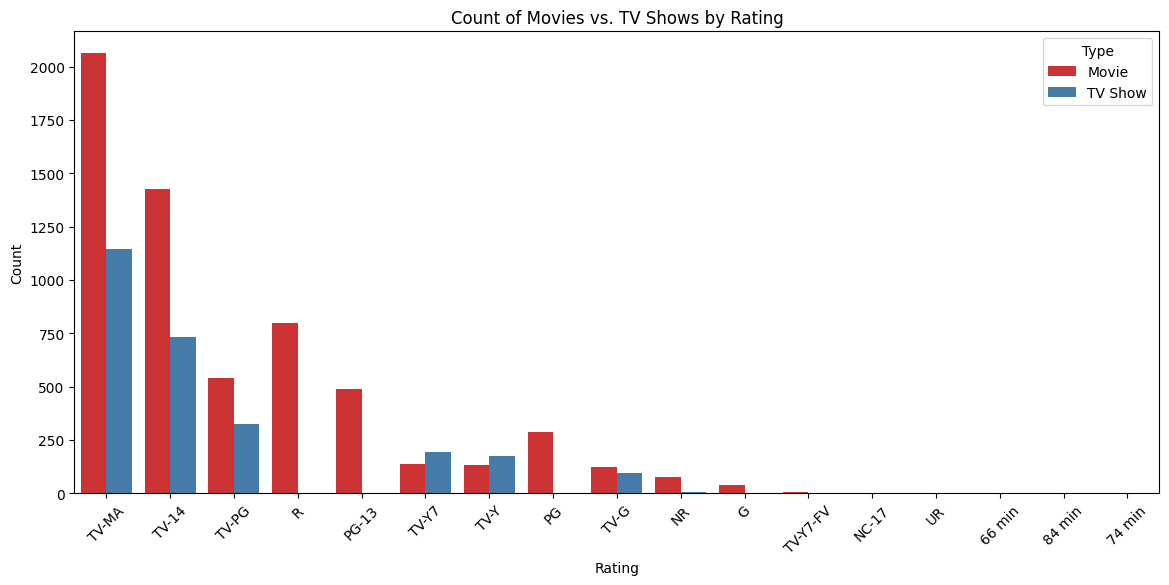

In [84]:
# Countplot for Type vs Rating
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', hue='type', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='Set1')
plt.title('Count of Movies vs. TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

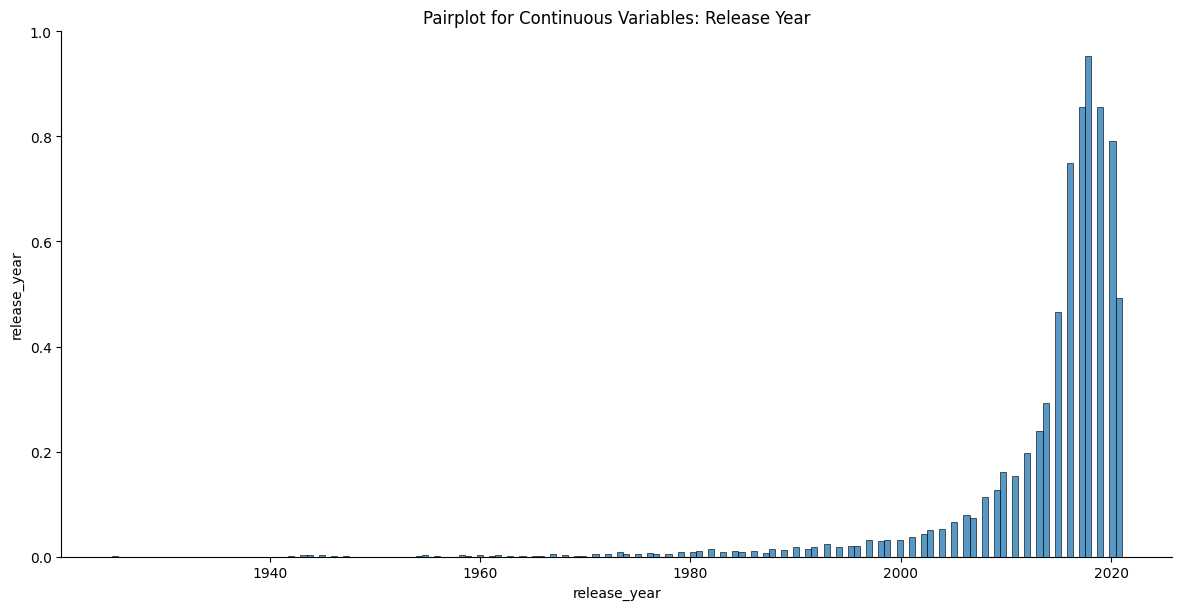

In [85]:
# Pairplot (only release_year is a continuous variable in the cleaned dataset)
sns.pairplot(netflix_data[['release_year']], kind='scatter', height=6, aspect=2)
plt.title('Pairplot for Continuous Variables: Release Year')
plt.show()

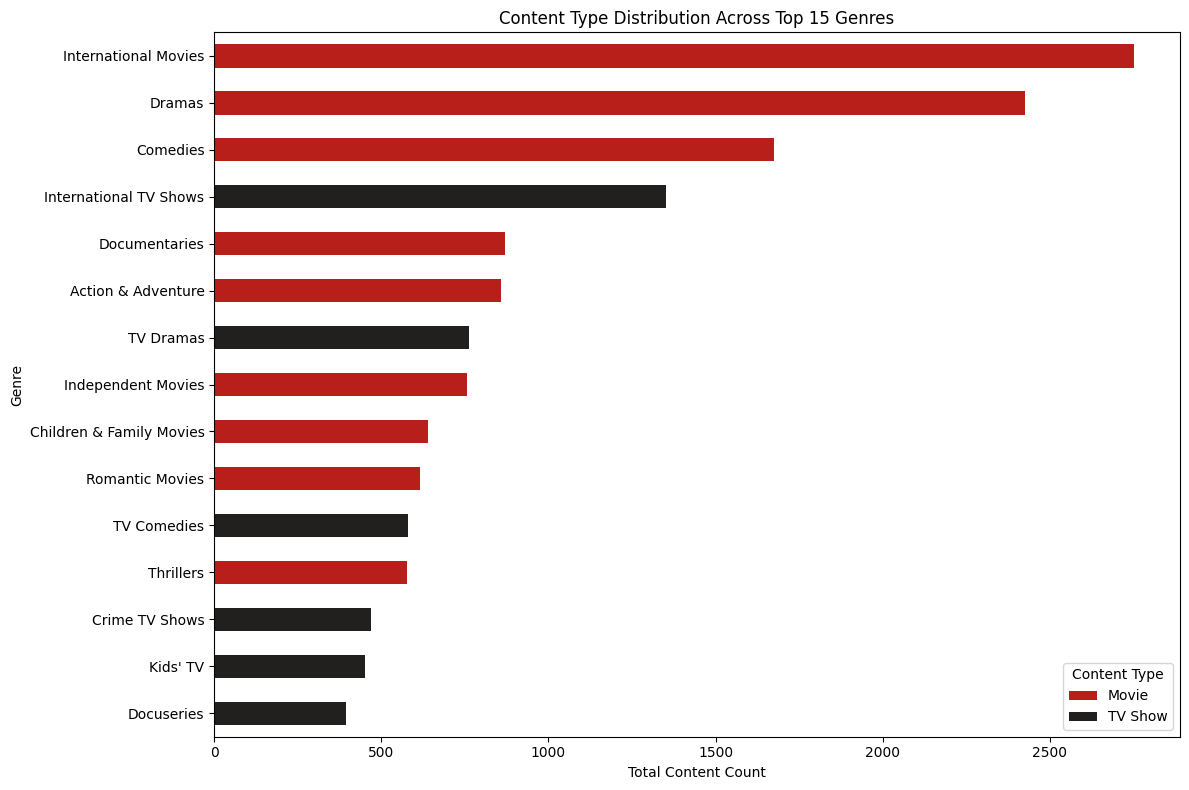

In [89]:
# 1. Explode the 'listed_in' column
netflix_data_genre_exploded = netflix_data.assign(
    listed_in=netflix_data['listed_in'].fillna('').str.split(', ')
).explode('listed_in')
netflix_data_genre_exploded = netflix_data_genre_exploded[netflix_data_genre_exploded['listed_in'].str.strip() != '']

# 2. Filter for Top 15 Genres
top_15_genres = netflix_data_genre_exploded['listed_in'].value_counts().nlargest(15).index
netflix_data_top_genre = netflix_data_genre_exploded[netflix_data_genre_exploded['listed_in'].isin(top_15_genres)]

# 3. Create, Sort, and Plot the Pivot Table
genre_type_pivot = netflix_data_top_genre.pivot_table(
    index='listed_in',
    columns='type',
    aggfunc='size',
    observed=False,
    fill_value=0
)
genre_type_pivot['Total'] = genre_type_pivot.sum(axis=1)
genre_type_pivot = genre_type_pivot.sort_values(by='Total', ascending=True).drop(columns='Total')

# 4. Plotting
plt.figure(figsize=(12, 8))
genre_type_pivot.plot(
    kind='barh', 
    stacked=True,
    color=['#b81f1b', '#221f1f'],
    ax=plt.gca()
)
plt.title('Content Type Distribution Across Top 15 Genres')
plt.xlabel('Total Content Count')
plt.ylabel('Genre')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

# Actionable Insights and Business Recommendations  


### Strategic Content Shift (Movie Dominance vs. TV Growth)  

Insight: Movies currently make up 69.7% of the content library, compared to 30.3% for TV Shows. 
    
Recommendation: Continue to emphasize TV Show production since TV Shows drive higher long-term engagement and subscriber retention compared to transactional movie viewing.  


### Bingeability Focus (Single-Season TV Strategy)  

Insight: 67.3% of all TV Shows are only 1 Season long.  

Recommendation: Recognize and communicate this strategy. The high proportion of 1-season shows indicates a strategic focus on miniseries, limited series, and "test runs" for new concepts.  

### Genre Strategy: Improving Discovery  

Insight: Current top genre tags primarily separate content by format (Movie vs. TV Show), not by the actual theme (e.g., 'Dramas' are movies, 'TV Dramas' are shows). This means there is missed opportunity to link similar content across the entire library.  

Recommendation: Specific tagging system (e.g., using 'Historical,' 'Political,' or 'Teen' tags) for the largest Movie categories. This will immediately improve the recommendation engine, allowing Netflix to seamlessly recommend a relevant TV Show to a Movie viewer, boosting engagement and cross-format discovery.

### Efficient Talent Management (Top Creative Teams)  

Insight: The top collaborations involve specific director-actor pairings.

Recommendation: Identify and prioritize future projects with these highly productive and successful Director/Actor/Creator teams. They represent proven efficiency in content delivery and can be relied upon for consistent output.

### Content Targeting and Maturity  

Insight: The TV-MA (Mature Audience) rating is the most frequent rating for TV Shows, and R is a top rating for Movies (as seen in the rating distribution chart).

Recommendation: Double down on acquiring and producing TV-MA and R-rated content in popular genres like Dramas, Thrillers, and Comedies. This content strongly targets the adult subscriber demographic, which drives subscription revenue.  
